In [159]:
#Conexión con google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [160]:
#Importación de librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Ángulos con Error menor a 3%

In [236]:
# Se requiere analizar los angulos que cumplen la aproximación sen(tetha) es
# Aproximandamente tetha con un error no mayor a 3%

angulos=[]

def erro(angulo,seno):
  return abs(((angulo - seno) / seno) *100)

def aproxAng(angulo):
  senoAng = np.sin(angulo)
  err = erro(angulo, senoAng)
  for i in range(0,len(err)):
    if err[i]<3:
      angulos.append(angulo[i])
  return err, angulos

#Se ingresan los angulos de 0 a 2pi con un número de 360, es decir todos los ángulos
error, angulos = aproxAng(np.linspace(0,2*np.pi, 360))

#Se desea mostrar la lista de angulos en grados
for i in range(0,len(angulos)):
  print(math.degrees(angulos[i]))


1.0027855153203342
2.0055710306406684
3.0083565459610027
4.011142061281337
5.01392757660167
6.016713091922005
7.0194986072423395
8.022284122562674
9.025069637883007
10.02785515320334
11.030640668523676
12.03342618384401
13.036211699164344
14.038997214484679
15.04178272980501
16.044568245125348
17.04735376044568
18.050139275766014
19.05292479108635
20.05571030640668
21.058495821727018
22.06128133704735
23.064066852367684


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


# Análisis de datos L=30 en 5 grados

In [161]:
#Cargue de datos a un dataframe
experimento=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa grande L 30 a 5 grados.xlsx")
experimento.head()

,t,x,y,θ,ω,α
0,0.0000,0.300000,-0.036818,-6.81,NaN,NaN
1,0.0333,0.308182,-0.034091,-6.30,-3.751078e+16,NaN
2,0.0660,0.308182,-0.038182,-6.20,-2.901346e+16,-1.120252e+16
3,0.0990,0.310909,-0.035455,-6.10,-4.664426e-01,2.542104e+14
4,0.1330,0.306818,-0.038182,-6.00,3.316569e+15,1.715517e+16


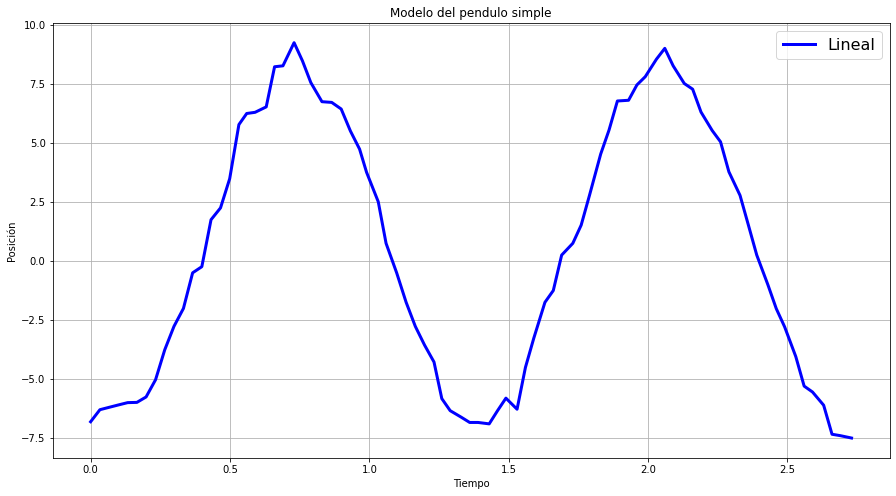

In [162]:
# Gráfica de posición angular vs tiempo
def plot_tethaVSt(tiempo, tetha):
  plt.figure(figsize=(15,8))
  plt.grid()
  plt.plot(tiempo, tetha, color = 'b', lw = 3, label = "Lineal")

  plt.legend(fontsize = 16)
  plt.xlabel("Tiempo")
  plt.ylabel("Posición")
  plt.title("Modelo del pendulo simple")
  plt.show()
  plt.show()
plot_tethaVSt(experimento['t'], experimento['θ'])

## Estimación de la gravedad



In [296]:
#Estimación de la gravedad
def grav_estima(L,T):
  g=(4* np.pi**2)*L/(T**2)
  return g/100

grav_estima(30,1.2)


7.579856180036627

In [291]:
#Cargue de datos a un dataframe
experimento=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa grande L 30 a 20 grados.xlsx")
experimento.head()

,t,x,y,θ,ω,α
0,0.000,0.273856,-0.115766,-20.0,0.000000e+00,0
1,0.033,0.278835,-0.112032,-19.7,3.458731e+15,0
2,0.066,0.281324,-0.105808,-18.5,6.427284e+15,8336586431916570
3,0.099,0.286304,-0.090870,-17.0,9.610859e+15,6128925063080220
4,0.133,0.290038,-0.073443,-14.2,1.029561e+16,14486146605845700


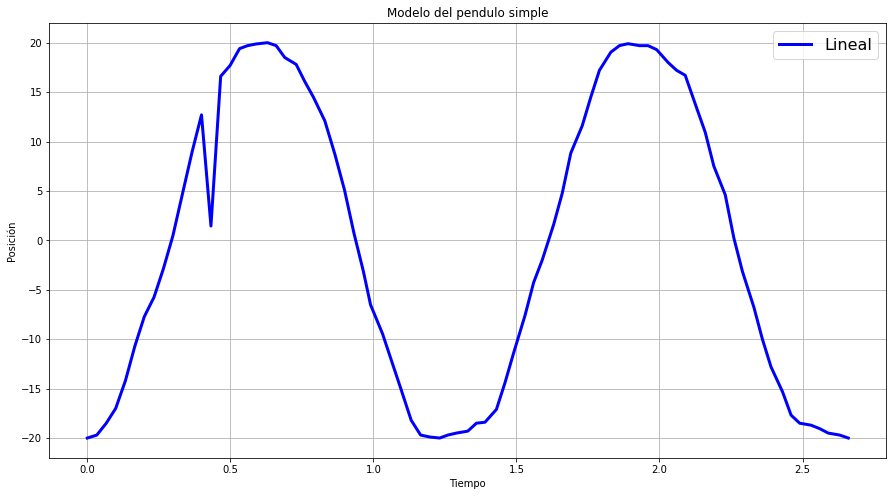

In [292]:
# Gráfica de posición angular vs tiempo
def plot_tethaVSt(tiempo, tetha):
  plt.figure(figsize=(15,8))
  plt.grid()
  plt.plot(tiempo, tetha, color = 'b', lw = 3, label = "Lineal")

  plt.legend(fontsize = 16)
  plt.xlabel("Tiempo")
  plt.ylabel("Posición")
  plt.title("Modelo del pendulo simple")
  plt.show()
  plt.show()
plot_tethaVSt(experimento['t'], experimento['θ'])

In [295]:
#Estimación de la gravedad
def grav_estima(L,T):
  g=(4* np.pi**2)*L/(T**2)
  return g/100

grav_estima(30,1.2)


8.224670334241132

## Simulación pendulo

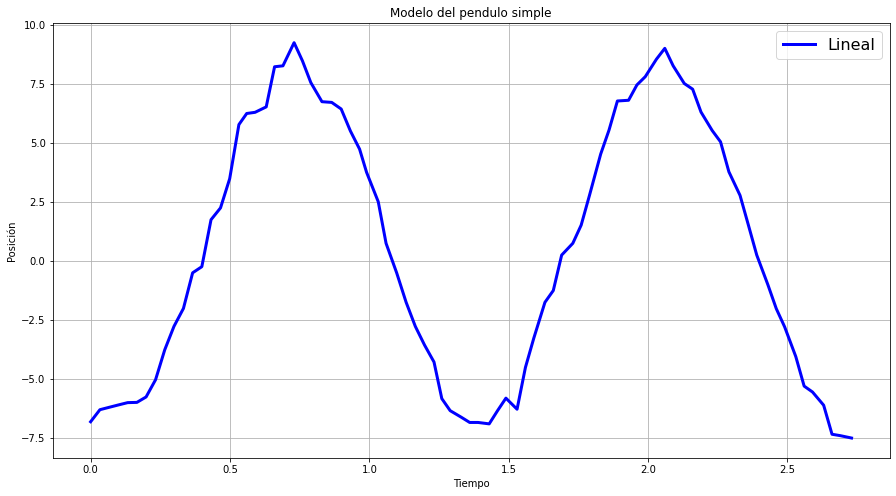

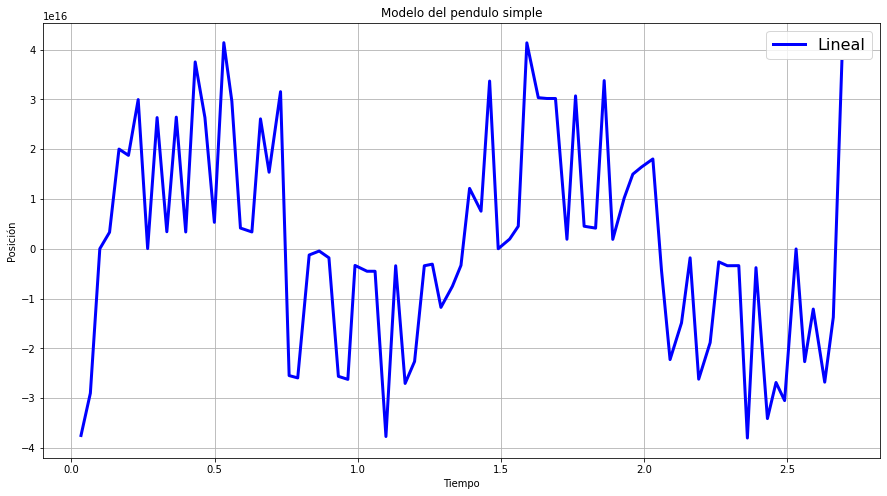

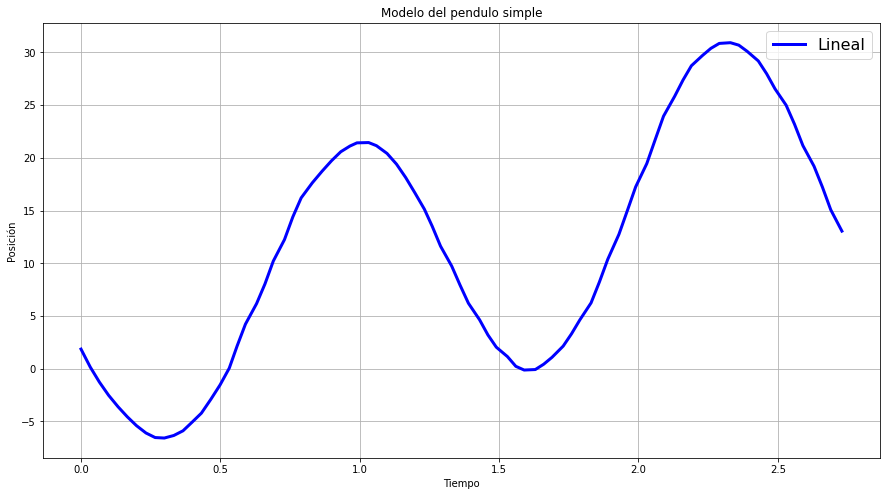

[ 1.8614      0.15264928 -1.26763012 -2.51857695 -3.61059162 -4.55715912
 -5.39913291 -6.09502066 -6.52874728 -6.57477229 -6.33263945 -5.88836402
 -5.0607772  -4.21387358 -2.89617482 -1.5346216   0.05555418  2.14643952
  4.22858993  6.17844344  8.03985936 10.21284344 12.2454566  14.39997286
 16.20682084 17.6369784  18.73542518 19.73285975 20.5806228  21.12243598
 21.42463389 21.45310104 21.15745939 20.42131934 19.40614042 18.13251422
 16.68194838 15.13356305 13.51997655 11.62472262  9.73914     7.92967333
  6.21272262  4.64484322  3.20256305  2.04494838  1.15031422  0.22907375
 -0.12514733 -0.07780728  0.42556771  1.08316722  2.14517598  3.31442947
  4.64239975  6.24436518  8.2291184  10.38236084 12.74657952 14.9817966
 17.24871677 19.45999936 21.7204501  23.95532993 25.84197952 27.38642751
 28.74005174 29.71823185 30.39039975 30.85822947 30.92717598 30.69364055
 30.10984104 29.19646605 27.97953267 26.54943375 24.99154088 23.19138171
 21.16739639 19.20667655 17.23488928 15.07597333 13.

In [290]:
#Simulación pendulo
L=30
Ang=10
w0=10
g=-8.2
alpha_s = np.empty(len(experimento['α']))
w_s = np.empty(len(experimento['α']))
tetha_s = np.copy(experimento['θ'])
for i in range(0,len(experimento['θ'])-1):
  alpha_s[i]=(tetha_s[i]*g)/L
  w_s[i+1]=((w_s[i]+(alpha_s[i+1]-alpha_s[i])))


for i in range(0,len(experimento['θ'])-1):
  tetha_s[i+1]=tetha_s[i]+ 

plot_tethaVSt(experimento['t'],tetha_s)
plot_tethaVSt(experimento['t'],experimento['ω'])
plot_tethaVSt(experimento['t'],w_s)


In [268]:
from scipy.integrate import odeint

In [271]:
def mps(x01,x02,L):
  plt.figure(figsize=(14,8))

  def df1(f1,t):
    x1, v1 = f1[0], f1[1]
    dx1 = v1
    dv1 =(9.8/L)*x1
    return [dx1, dv1]

  def df2(f2,t):
    x2, v2 = f2[0], f2[1]
    dx2 = v2
    dv2 = (9.8/L)*np.sin(x2)
    return [dx2, dv2]

  t = np.linspace(0,4*np.pi, 200)
  sol1 = odeint(df1, x01, t)
  sol2 = odeint(df2, x02, t)
  f1 = sol1[:,0]
  f2 = sol2[:,0]

  plt.grid()
  plt.plot(t, f1, color = 'b', lw = 3, label = "Lineal")
  plt.plot(t, f2, color = 'r', lw = 3, label = "No Lineal")
  plt.legend(fontsize = 16)
  plt.xlabel("Tiempo")
  plt.ylabel("Posición")
  plt.title("Modelo del pendulo simple")
  plt.show()

  return mps
